# Agenda  <a name="backtotop"></a>
---

1. [Bar Graph](#BarGraph)
2. [Line Graph](#LineGraph)


## Bar Graph <a name="BarGraph">
</a>


[back to top](#backtotop)

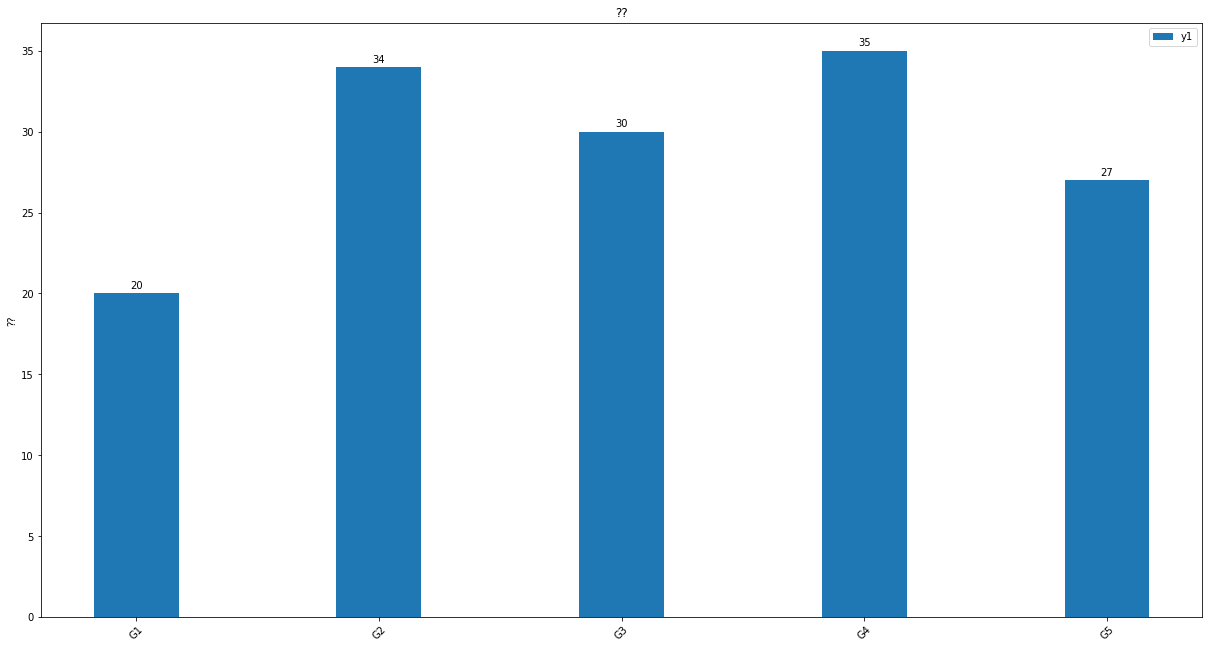

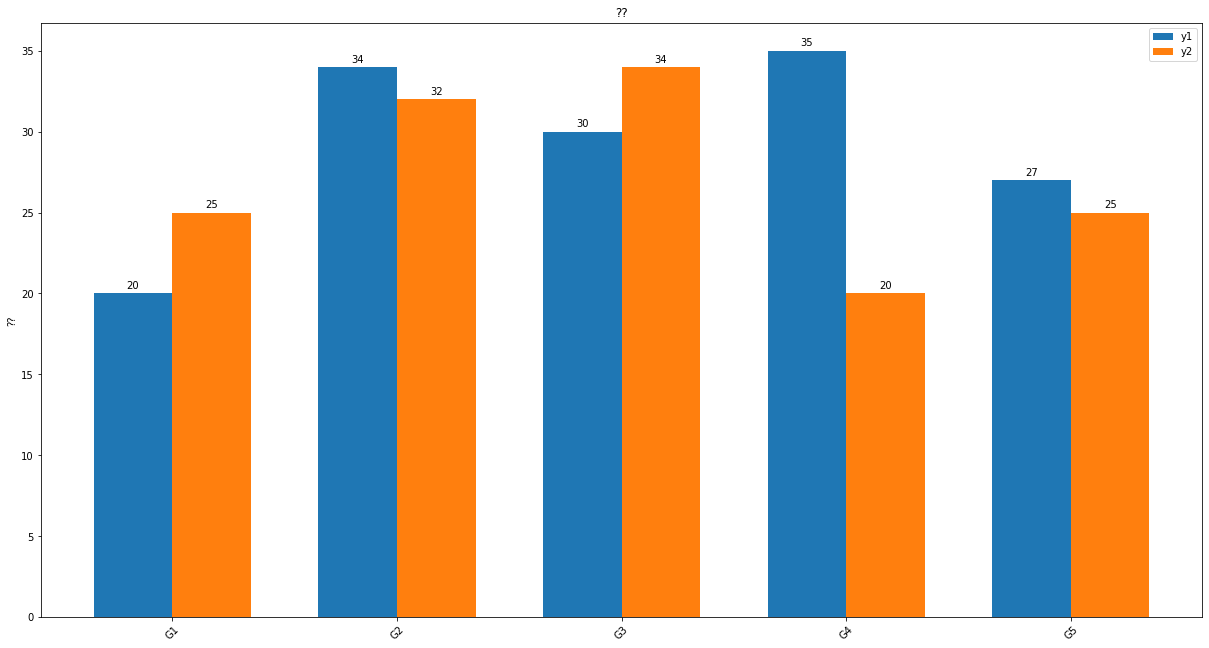

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

def PlotBarGraph(x, y1, y2 = None):
    x_range = np.arange(len(x))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    if y2:
        rects1 = ax.bar(x_range - width/2, y1, width, label='y1')
        rects2 = ax.bar(x_range + width/2, y2, width, label='y2')
    else:
        rects1 = ax.bar(x_range, y1, width, label='y1')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('??')
    ax.set_title('??')
    ax.set_xticks(x_range)
    ax.tick_params(axis = 'x', rotation = 45)
    ax.set_xticklabels(x)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    if y2:
        autolabel(rects2)
    

    fig.tight_layout()
    fig.set_size_inches(18.5, 10.5)

    return plt.show()
    
    
PlotBarGraph(labels, men_means)
PlotBarGraph(labels, men_means, women_means)

## Line Graph <a name="LineGraph">
</a>


[back to top](#backtotop)

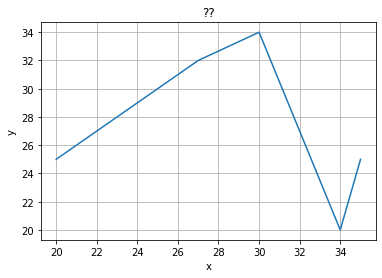

In [12]:
x = sorted([20, 34, 30, 35, 27])
y = [25, 32, 34, 20, 25]

def PlotLineGraph(x, y, path = None):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set(xlabel = 'x', ylabel= 'y',
        title = '??')
    ax.grid()
    if path:
        fig.savefig(path)
    plt.show()

PlotLineGraph(x, y)